# Gradient Descent

In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

We will import for you the following dataset of ingredients with their mineral content

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_ingredients_zinc_phosphorous.csv")
data.head()

aliment      zinc  phosphorus
0  Durum wheat pre-cooked. whole grain. cooked. u...  0.120907    0.193784
1             Asian noodles. plain. cooked. unsalted  0.047859    0.060329
2                      Rice. brown. cooked. unsalted  0.156171    0.201097
3                             Rice. cooked. unsalted  0.065491    0.045704
4                  Rice. parboiled. cooked. unsalted  0.025189    0.045704

👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

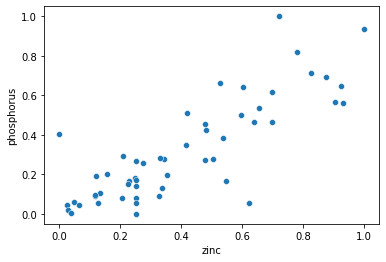

In [2]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

👇 Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [3]:
import numpy as np
data_X = np.array(data['zinc'])
data_Y = np.array(data['phosphorus'])

In [4]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

👇 Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [5]:
def h(X,a,b):
    # $CHALLENGIFY_BEGIN
    y_pred = a*X + b
    return y_pred
    # $CHALLENGIFY_END

### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

👇 Define the SSR Loss Function for the Hypothesis Function using the equation above. Reuse the function `h` coded above when writing your new function.


In [6]:
import numpy as np

def loss(X,Y,a,b):
    # $CHALLENGIFY_BEGIN
    Y_pred = h(X,a,b)
    loss = np.sum((Y-Y_pred) ** 2)
    return loss
    # $CHALLENGIFY_END

❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [7]:
loss(data_X,data_Y,1,1)

63.868506986115456

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

👇 Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given point.


<details>
<summary>💡 Hint</summary>
Again, you must re-use the Hypothesis Function in your new function to compute the predictions at given points.
</details>

In [8]:
def gradient(X,Y,a,b):
    # $CHALLENGIFY_BEGIN
    Y_pred = h(X,a,b)
    d_a = np.sum(-2*(Y-Y_pred)*X)
    d_b = np.sum(-2*(Y-Y_pred))
    # $CHALLENGIFY_END
    return d_a, d_b

❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [9]:
gradient(data_X,data_Y,1,1)

(48.459065809109006, 115.17923733301406)

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

👇 Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a `learning_rate` equal to `0.01` by default

In [10]:
def steps(d_a,d_b, learning_rate = 0.01):
    # $CHALLENGIFY_BEGIN
    step_a = d_a*learning_rate
    step_b = d_b*learning_rate
    # $CHALLENGIFY_END
    return (step_a, step_b)

❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [11]:
d_a, d_b = gradient(data_X,data_Y,1,1)

steps(d_a,d_b,learning_rate = 0.01)

(0.4845906580910901, 1.1517923733301405)

⚠️ The steps should be 0.48 for a and 1.15 for b

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

👇 Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [12]:
def update_params(a, b, step_a, step_b):
    # $CHALLENGIFY_BEGIN
    a_new = a - step_a
    b_new = b - step_b
    # $CHALLENGIFY_END
    return a_new , b_new

### 2.6 One full epoch

👇 Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [13]:
a = 1
b = 1

d_a, d_b = gradient(data_X,data_Y,a,b)

step_a, step_b = steps(d_a,d_b,learning_rate = 0.01)

a_new, b_new = update_params(a,b,step_a,step_b)

print(a_new)
print(b_new)

0.5154093419089099
-0.1517923733301405


⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

👇 Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the values for `loss`, `a`, and `b` at each epoch to their corresponding lists called `loss_history`, `a_history` and `b_history`

In [14]:
# Initialize a and b
a = 1
b = 1
loss_history = []
a_history = []
b_history = []

# Loop through steps to perform Gradient Descent
for epoch in range(100):

    a_history.append(a)
    b_history.append(b)    
    
    ########################################
    # Current Loss with Current parameters #
    ########################################    
    
    # Compute Loss at each Epoch and append to loss_history
    loss_epoch = loss(data_X,data_Y,a,b)
    loss_history.append(loss_epoch)

    ########################################
    # Updating the parameters              #
    ########################################   
    
    # Compute the gradient (the two partial derivatives) 
    d_a, d_b = gradient(data_X,data_Y,a,b)
    
    # Compute steps
    step_a, step_b = steps(d_a,d_b)
    
    # Compute updated parameters
    a, b = update_params(a, b, step_a,step_b)

    
pd.DataFrame({"a_history":a_history,
              "b_history":b_history,
              "loss_history":loss_history}).tail()

a_history  b_history  loss_history
95   0.768603   0.007119      1.082069
96   0.768619   0.007112      1.082069
97   0.768633   0.007106      1.082069
98   0.768647   0.007100      1.082069
99   0.768660   0.007094      1.082069

❓ What are the parameter values `a_100` and `b_100` at the end of the 100 epochs?

In [15]:
a_100 = a
b_100 = b
print(a,b)

0.768671510620374 0.00708932115622393


In [16]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/04-Under-the-hood/03-Batch-Gradient-Descent/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Visual check

👇 Wrap this iterative approach into a method `gradient_descent()` which returns your `new_a`, `new_b` and `history`, a dictionary containing these lists: 
- `loss_history`
- `a_history`
- `b_history`

In [17]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    # $CHALLENGIFY_BEGIN
    a = a_init
    b = b_init
    loss_history = []
    a_history = []
    b_history = []
    
    for epoch in range(n_epochs):
        
        a_history.append(a)
        b_history.append(b)    
    
        ########################################
        # Current Loss with Current parameters #
        ########################################    
    
        # Compute Loss at each Epoch and append to loss_history
        loss_epoch = loss(X,Y,a,b)
        loss_history.append(loss_epoch)
        print(f"loss = {loss_epoch}")        
  
        ########################################
        # Updating the parameters              #
        ########################################   
        
        d_a, d_b = gradient(X,Y,a,b)
        step_a, step_b = steps(d_a,d_b,learning_rate)
        a, b = update_params(a, b, step_a, step_b)

    history = {'loss': loss_history, 'a': a_history, 'b': b_history}
    # $CHALLENGIFY_END
    return a, b, history

In [18]:
a_best, b_best, history = gradient_descent(data_X,data_Y, learning_rate=0.001)

loss = 63.868506986115456
loss = 49.22630594850083
loss = 38.0041062761779
loss = 29.40302168743977
loss = 22.810780603736497
loss = 17.758134141228197
loss = 13.885446918588597
loss = 10.917092039868042
loss = 8.641827246697208
loss = 6.897755076668324
loss = 5.560796233170198
loss = 4.535855502798851
loss = 3.750051258334261
loss = 3.147526506803749
loss = 2.6854720437464703
loss = 2.331078573370289
loss = 2.0592007940698394
loss = 1.8505671387201854
loss = 1.6904077082568134
loss = 1.5674027112469073
loss = 1.4728765412884344
loss = 1.4001801128009483
loss = 1.344217479243815
loss = 1.3010830303034528
loss = 1.267783437504973
loss = 1.2420245515547421
loss = 1.2220480791022241
loss = 1.2065064107650831
loss = 1.1943666885248938
loss = 1.184837282362337
loss = 1.1773114414759789
loss = 1.1713241082111139
loss = 1.1665188199733034
loss = 1.1626223426375724
loss = 1.159425229425081
loss = 1.1567669210958016
loss = 1.1545243266347287
loss = 1.1526030714105249
loss = 1.150930789702083
lo

👇 Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

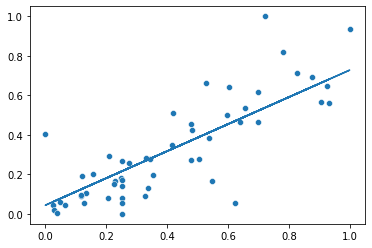

In [19]:
import matplotlib.pyplot as plt
sns.scatterplot(x=data_X, y=data_Y)
plt.plot(data_X, h(data_X,a_best,b_best))

## 5. Visualize your descent

Our goal is to plot our loss function and the descent steps on a 2D surface using matplotlib [contourf]

👇Start by creating the data we need for the plot
- `range_a`: a range of 100 values for `a` equally spaced between -1 and 1
- `range_b`: a range of 100 values for `b` equally spaced between -1 and 1 
- `Z`: a 2D-array where each element `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [20]:
range_a = np.linspace(-1,1,100)
range_b = np.linspace(-1,1,100)

In [21]:
Z = np.zeros((len(range_a),len(range_b)))
for (i, a) in enumerate(range_a):
    for (j, b) in enumerate(range_b):
        Z[j,i] = loss(data_X,data_Y,a,b)

👇 Now, plot in one single subplot:
- your gradient as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html)
- all historical (a,b) points as red dots to visualize your gradient descent!

Change your learning rate and observe its impact on the graph!

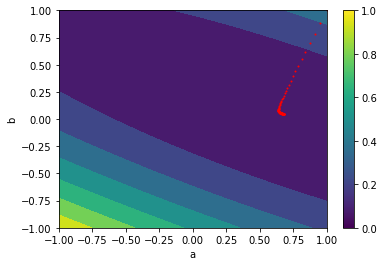

In [22]:
plt.contourf(range_a, range_b, Z)
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(history['a'], history['b'], c='r', s=1)
plt.colorbar();

👇 [optional] What about 3D? Try out this [plot.ly - 3D contour plot](https://plotly.com/python/3d-surface-plots/) below

In [23]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

👇 Plot the history of the `loss` values as a function of the number of `epochs`. Vary the `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

loss = 63.868506986115456
loss = 56.30432228378523
loss = 49.65286334586689
loss = 43.80398734491345
loss = 38.66084296026131
loss = 34.13826642247964
loss = 30.161371115516776
loss = 26.664307378925407
loss = 23.589171971233334
loss = 20.885049134067568
loss = 18.50716737608114
loss = 16.41615801216936
loss = 14.577403178633013
loss = 12.96046252675851
loss = 11.538569100279252
loss = 10.288186047937764
loss = 9.188616829859095
loss = 8.221662462357816
loss = 7.371320124804955
loss = 6.623518137179049
loss = 5.965882919260775
loss = 5.387534072079116
loss = 4.878904187950029
loss = 4.43158040497916
loss = 4.038165082010483
loss = 3.69215328665675
loss = 3.3878250674893384
loss = 3.1201507263057042
loss = 2.884707521687168
loss = 2.677606424373477
loss = 2.4954277114489147
loss = 2.335164332714368
loss = 2.194172111335058
loss = 2.070125954036204
loss = 1.9609813456430305
loss = 1.8649404902757203
loss = 1.7804225384631436
loss = 1.7060374071062174
loss = 1.6405627587229494
loss = 1.58

loss = 1.1143156171549866
loss = 1.1128251092838568
loss = 1.1114034954433656
loss = 1.1100475912219676
loss = 1.1087543593989808
loss = 1.1075209031401467
loss = 1.1063444595083873
loss = 1.105222393274728
loss = 1.104152191015363
loss = 1.1031314554815805
loss = 1.1021579002299353
loss = 1.1012293445006245
loss = 1.10034370833259
loss = 1.0994990079044178
loss = 1.0986933510905845
loss = 1.0979249332231034
loss = 1.0971920330490772
loss = 1.0964930088750973
loss = 1.0958262948898563
loss = 1.0951903976567392
loss = 1.0945838927685303
loss = 1.0940054216567467
loss = 1.0934536885484512
loss = 1.0929274575637247
loss = 1.0924255499473021
loss = 1.0919468414281641
loss = 1.0914902597011744
loss = 1.0910547820251213
loss = 1.0906394329317828
loss = 1.0902432820408778
loss = 1.089865441976023
loss = 1.0895050663770096
loss = 1.0891613480039612
loss = 1.0888335169291203
loss = 1.088520838812213
loss = 1.088222613255529
loss = 1.0879381722350339
loss = 1.087666878603999
loss = 1.08740812466

loss = 1.0837022651661528
loss = 1.0835949517823686
loss = 1.0834946885035535
loss = 1.0834010121630602
loss = 1.083313490022633
loss = 1.083231717773369
loss = 1.083155317668012
loss = 1.0830839367759473
loss = 1.0830172453528388
loss = 1.0829549353173715
loss = 1.0828967188280685
loss = 1.0828423269536094
loss = 1.0827915084304955
loss = 1.0827440285023426
loss = 1.0826996678354186
loss = 1.0826582215054323
loss = 1.0826194980508852
loss = 1.0825833185886122
loss = 1.082549515987433
loss = 1.0825179340960864
loss = 1.0824884270218895
loss = 1.0824608584567872
loss = 1.0824351010476743
loss = 1.0824110358080896
loss = 1.0823885515685545
loss = 1.0823675444630294
loss = 1.0823479174490995
loss = 1.0823295798596908
loss = 1.0823124469842287
loss = 1.082296439677323
loss = 1.0822814839931503
loss = 1.082267510843863
loss = 1.0822544556804394
loss = 1.0822422581944957
loss = 1.0822308620396919
loss = 1.0822202145714437
loss = 1.0822102666037243
loss = 1.082200972181856


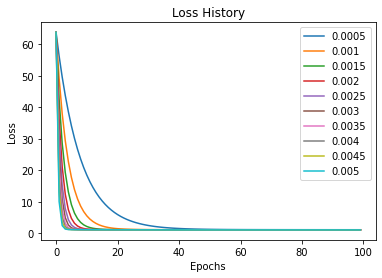

In [ ]:
for l in np.linspace(0.0005, 0.005, num=10):
    a_best, b_best, history = gradient_descent(data_X,data_Y, learning_rate=l)
    plt.plot(history['loss'], label=f'{round(l,5)}')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 6. With Sklearn...

👇 Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_X.reshape(-1,1), data_Y)
slope, intercept = model.coef_, model.intercept_ 
print(slope,intercept)

[0.76883717] 0.0070177202010621165


They should be almost identical!

### 🏁 Congratulation! Please, push your exercise when you are done